## From the article

# Implementing a distance-based classifier with a quantum interference circuit

###  M. Schuld et al 2017 EPL 119 60002

# Preparing the data

In [172]:
import numpy as np
import pandas as pd

In [173]:
iris = pd.read_csv("Iris/iris.data",header=None,names=["f0","f1","f2","f3","class"])

In [174]:
setosa = iris[iris["class"] == "Iris-setosa"].loc[:,["f0","f1","class"]]
setosa.loc[:,"class"] = -1
setosa["color"] = "DarkGreen"

In [175]:
versicolor = iris[iris["class"] == "Iris-versicolor"].loc[:,["f0","f1","class"]]
versicolor.loc[:,"class"] = 1
versicolor["color"] = "DarkBlue"

In [176]:
data = pd.concat([setosa,versicolor])

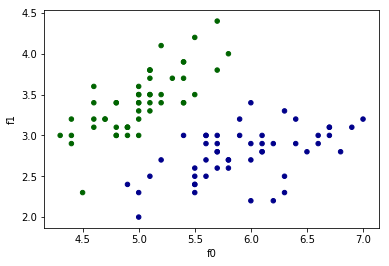

In [177]:
data.plot.scatter(x="f0", y="f1", c=data.color)

In [178]:
# data.mean()
# data["f0"] -= data.mean()[0]
# data["f1"] -= data.mean()[1]

In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.loc[:,["f0","f1"]] = scaler.fit_transform(data.loc[:,["f0","f1"]])

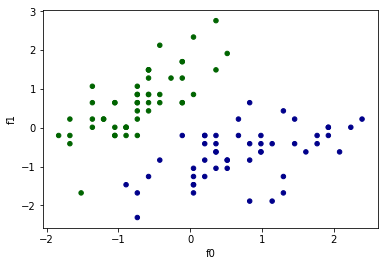

In [180]:
data.plot.scatter(x="f0", y="f1", c=data.color)

In [181]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

In [182]:
for i in range(len(data.index)):
    v = [data["f0"][i],data["f1"][i]]
    v = normalize(v)
    data.loc[i,"f0"], data.loc[i,"f1"] = v[0], v[1]

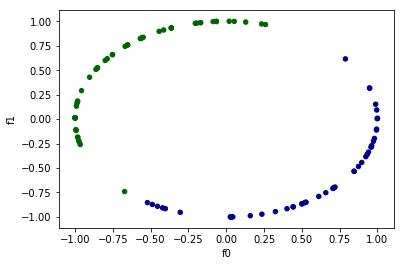

In [183]:
data.plot.scatter(x="f0", y="f1", c=data.color)

# Building the quantum circuit

In [1]:
import qiskit
from qiskit import IBMQ
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    execute,
    Aer)
from qiskit.visualization import plot_histogram
import qiskit.aqua.circuits.gates.controlled_ry_gates

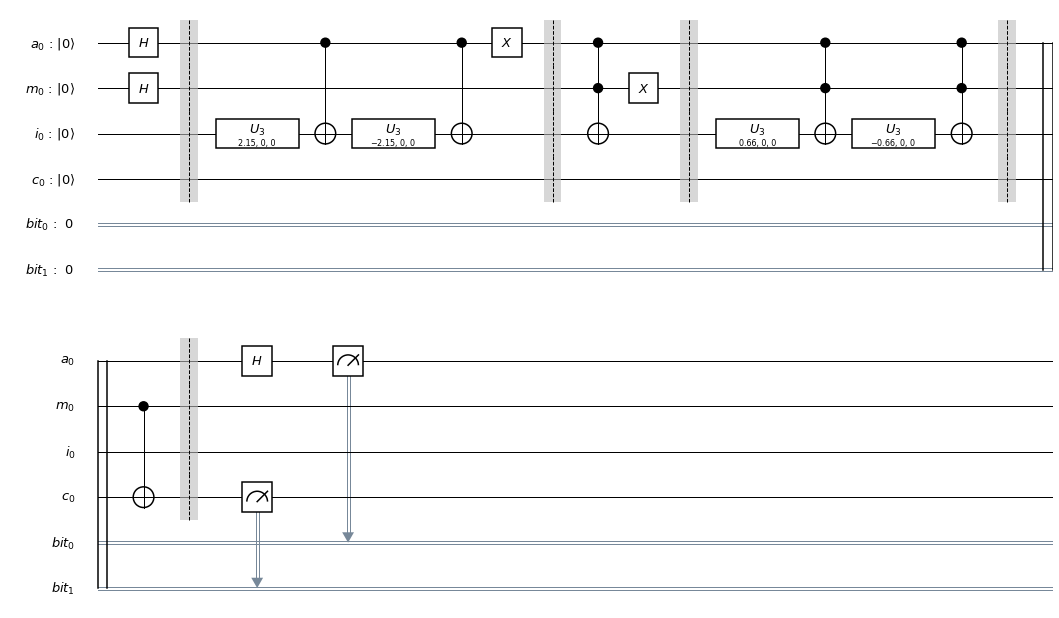

In [59]:
a = QuantumRegister(1,'a')
m = QuantumRegister(1,'m')
i = QuantumRegister(1,'i')
c = QuantumRegister(1,'c')
b = ClassicalRegister(2, 'bit')
circuit = QuantumCircuit(a,m,i,c,b)

circuit.h(a)
circuit.h(m)

circuit.barrier()

circuit.cry(4.304,a[0],i[0])
circuit.x(a)

circuit.barrier()

circuit.ccx(a,m,i)
circuit.x(m)

circuit.barrier()

circuit.mcry(1.325,a[:]+m[:],i[0],None)

circuit.barrier()

circuit.cx(m,c)

circuit.barrier()

circuit.h(a)
circuit.measure(a,b[0])
circuit.measure(c,b[1])

circuit.draw(output='mpl')


Total counts are: {'00': 3815, '01': 339, '11': 1832, '10': 2206}


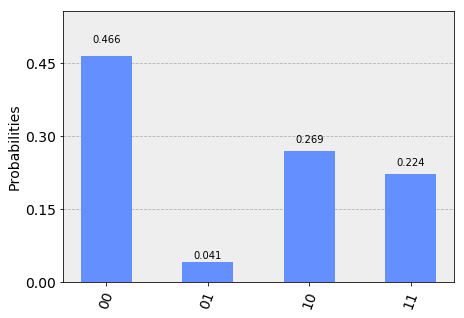

In [268]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=8192)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal counts are:",counts)
plot_histogram(counts)

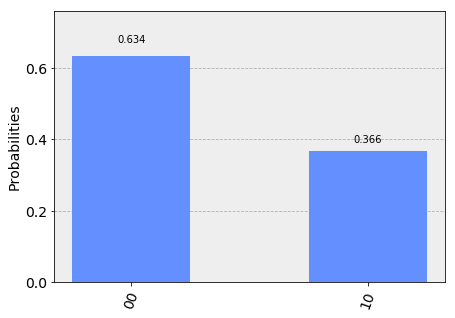

In [269]:
goodCounts = {k: counts[k] for k in counts.keys() & {'00', '10'}}
plot_histogram(goodCounts)